In [1]:
import torch

from network import Network
from data import get_MNIST_data_loaders
from train import train_network
from evaluate import accuracy

In [ ]:
device = torch.device("gpu" if torch.cuda.is_available() else "cpu")
print(f"{device=}")

variant = "l"
in_dim = 1 if variant == "p" else 28
hidden_dim = 16
out_dim = 10
batch_size = 256

train_loader, test_loader = get_MNIST_data_loaders(batch_size)
model = Network(
    in_dim, 
    hidden_dim, 
    out_dim, 
    neuron_type="gfr", 
    freeze_neurons=False, 
    freeze_g=True
)

train_network(
    model, 
    train_loader, 
    epochs=30, 
    lr=0.005, 
    variant=variant,
    C=3
)

train_acc = accuracy(model, train_loader, variant=variant)
test_acc = accuracy(model, test_loader, variant=variant)
print(f"Train accuracy: {train_acc} | Test accuracy: {test_acc}")

device=device(type='cpu')
Epoch 1 | Loss: 616.7218627929688
Epoch 2 | Loss: 523.629638671875
Epoch 3 | Loss: 513.5846557617188
Epoch 4 | Loss: 508.8643798828125
Epoch 5 | Loss: 505.455322265625
Epoch 6 | Loss: 503.0670471191406
Epoch 7 | Loss: 501.4256591796875
Epoch 8 | Loss: 500.0439758300781
Epoch 9 | Loss: 499.04266357421875
Epoch 10 | Loss: 497.9465026855469
Epoch 11 | Loss: 497.3560791015625
Epoch 12 | Loss: 496.73583984375
Epoch 13 | Loss: 496.5545959472656
Epoch 14 | Loss: 495.31854248046875


In [ ]:
{
    "model_state_dict": model.to(torch.device("cpu")).state_dict(),
    "train_accuracy": train_acc,
    "test_accuracy": test_acc
}

In [3]:
model.hidden_neurons.a.shape

torch.Size([16, 5])

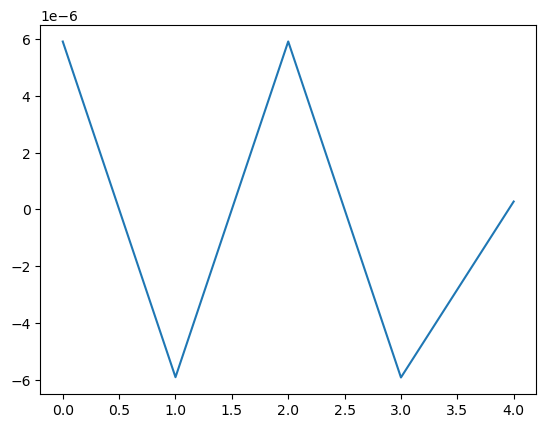

In [10]:
import matplotlib.pyplot as plt

plt.plot(list(range(model.hidden_neurons.k)), model.hidden_neurons.a.detach()[4,:]) 